# The dataset contains the marks secured by the students in various subjects.Lets try to understand the influence of the parents background,test preparation on students performance

In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Opening CSV file 

In [68]:
file_path= r"https://raw.githubusercontent.com/Shivan118/Student-Performance-Project/main/students.csv"
df=pd.read_csv(file_path)

In [69]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
#student performance analysis project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are no null values in the dataset

In [71]:
df.shape

(1000, 8)

In [72]:
cat_columns=[i  for i  in df.columns if df[i].dtype=='object']
cat_columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [73]:
for i in cat_columns:
    print(f"No of unique values of {i} are {df[i].nunique()}")
    print(f"unique values of {i} are {df[i].unique()}")

No of unique values of gender are 2
unique values of gender are ['female' 'male']
No of unique values of race/ethnicity are 5
unique values of race/ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
No of unique values of parental level of education are 6
unique values of parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
No of unique values of lunch are 2
unique values of lunch are ['standard' 'free/reduced']
No of unique values of test preparation course are 2
unique values of test preparation course are ['none' 'completed']


In [74]:
df.duplicated().sum()

0

In [75]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [76]:
numerical_columns=[i for i in df.columns if i not in cat_columns]
numerical_columns 

['math score', 'reading score', 'writing score']

In [77]:
df['total_score']=df['math score']+df['reading score']+df['writing score' ]
df['avg_score']=df['total_score'] // 3

In [78]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


In [79]:
passmarks=35
df['percentage']=(df['math score']+df['reading score']+df['writing score' ])//3


In [80]:
def Grade(percentage):
    if (percentage>=95):
        return 'O'
    if (percentage>=81):
        return 'A'
    if (percentage>=71):
        return 'B'
    if (percentage>=61):
        return 'C'
    if (percentage>=51):
        return 'D'
    if (percentage>=41):
        return 'E'
    else :
        return 'F'


In [81]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72,72
1,female,group C,some college,standard,completed,69,90,88,247,82,82
2,female,group B,master's degree,standard,none,90,95,93,278,92,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49,49
4,male,group C,some college,standard,none,76,78,75,229,76,76


In [82]:
df['grade']=df.apply(lambda x: Grade(x['percentage']),axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72,72,B
1,female,group C,some college,standard,completed,69,90,88,247,82,82,A
2,female,group B,master's degree,standard,none,90,95,93,278,92,92,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49,49,E
4,male,group C,some college,standard,none,76,78,75,229,76,76,B


In [83]:
# How many students got full marks
reading_score=df[df['reading score']==100]['avg_score'].count()
reading_score

17

In [84]:
math_score=df[df['math score']==100]['avg_score'].count()
math_score

7

In [85]:
writing_score=df[df['writing score']==100]['avg_score'].count()
writing_score

14

In [86]:
#Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

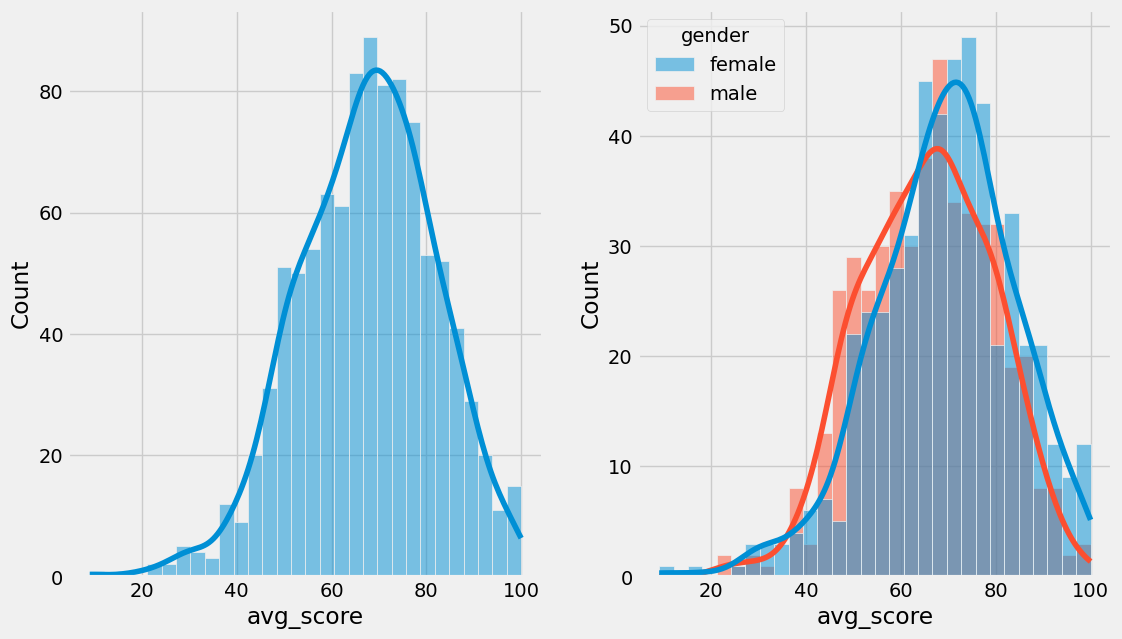

In [87]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='avg_score',bins=30,kde=True ,hue='gender')
plt.show()

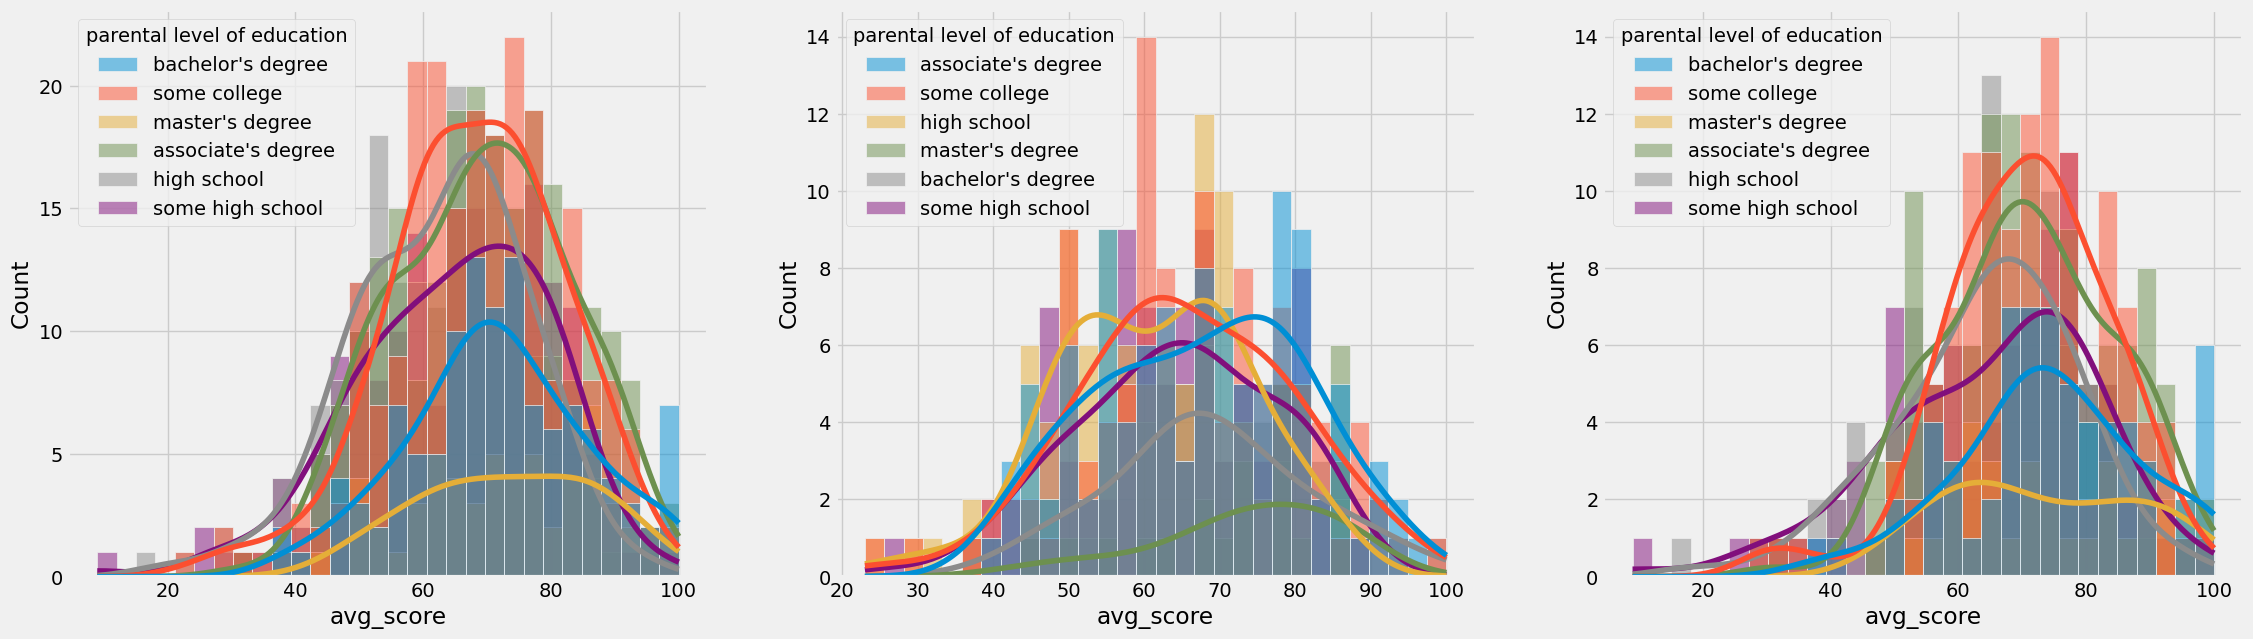

In [88]:
fig,ax=plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='avg_score',bins=30,kde=True ,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True ,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True ,hue='parental level of education')
plt.show()

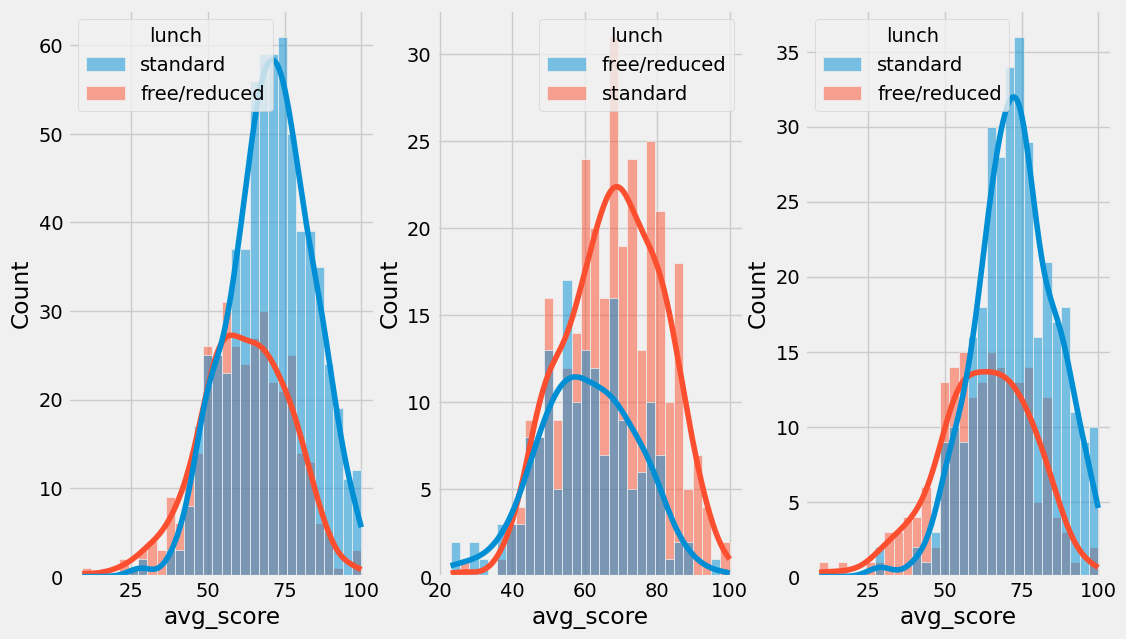

In [89]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
plt.subplot(131)
sns.histplot(data=df,x='avg_score',bins=30,kde=True ,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True ,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True ,hue='lunch')
plt.show()

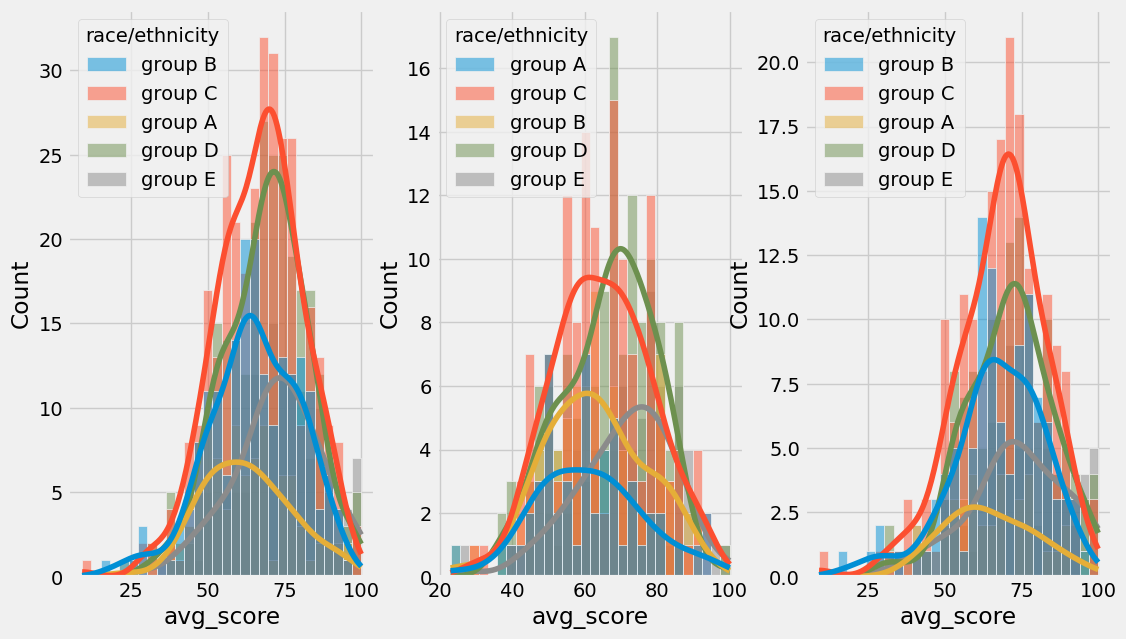

In [90]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
plt.subplot(131)
sns.histplot(data=df,x='avg_score',bins=30,kde=True ,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True ,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True ,hue='race/ethnicity')
plt.show()

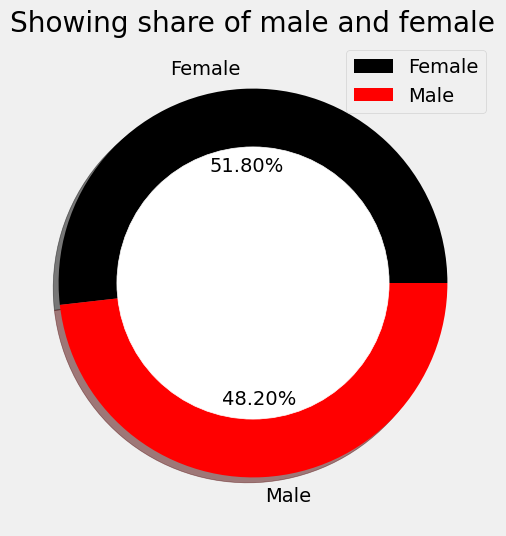

In [91]:
size=df['gender'].value_counts()
colors=['black','red','blue']
labels='Female','Male'

my_circle=plt.Circle((0,0),0.7,color='white')

plt.rcParams['figure.figsize']=(6,6)
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Showing share of male and female')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

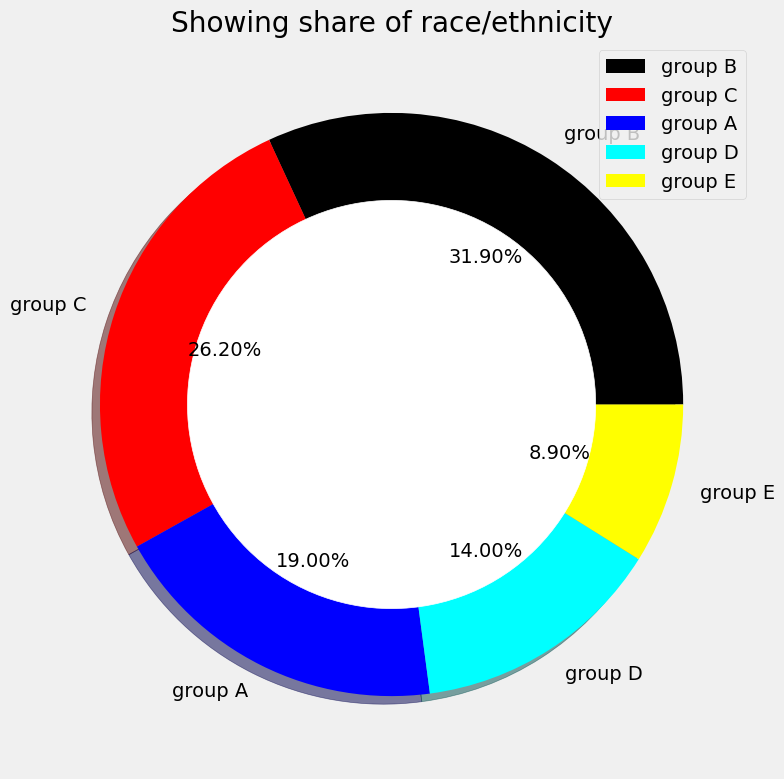

In [92]:
size=df['race/ethnicity'].value_counts()
colors=['black','red','blue','cyan','yellow','green']
labels=['group B' ,'group C', 'group A' ,'group D', 'group E']

my_circle=plt.Circle((0,0),0.7,color='white')

plt.rcParams['figure.figsize']=(9,9)
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Showing share of race/ethnicity')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

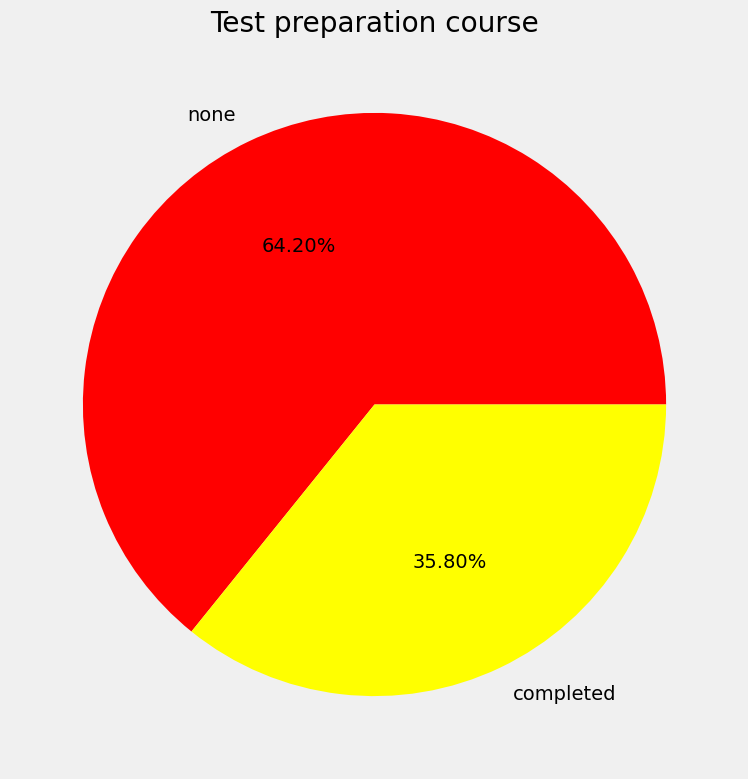

In [93]:
plt.pie(df['test preparation course'].value_counts(),colors=['red','yellow'],
labels=df['test preparation course'].unique(),autopct='%.2f%%')
plt.title('Test preparation course')
plt.show()

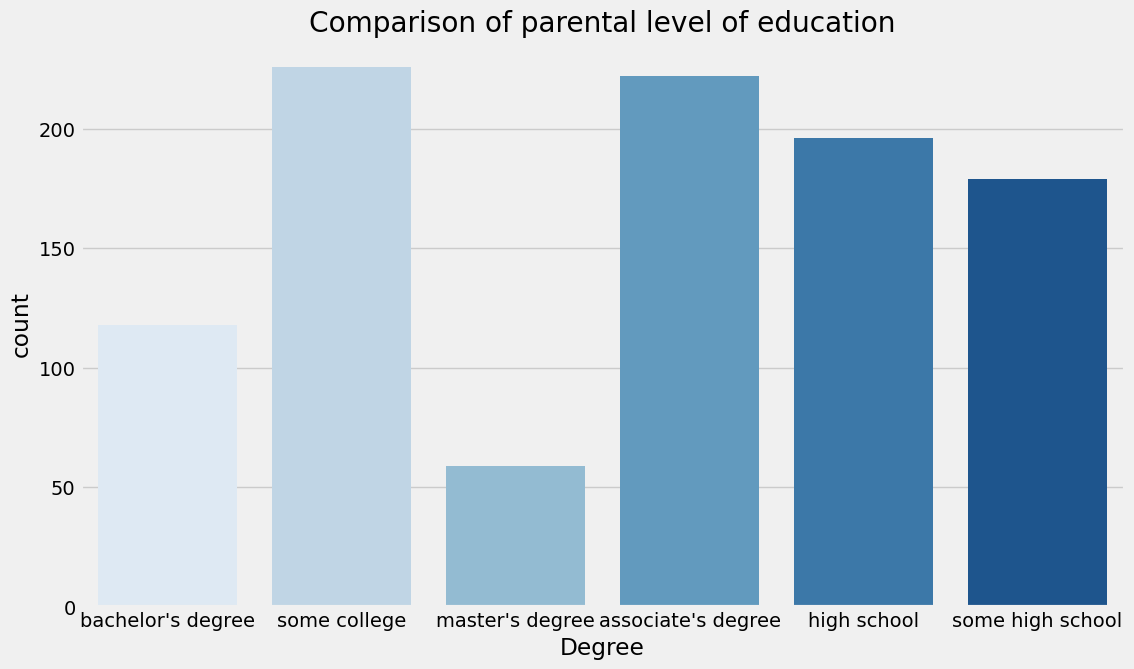

In [94]:
plt.figure(figsize=(12,7))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='Blues')
plt.title("Comparison of parental level of education")
plt.xlabel("Degree")
plt.ylabel("count")
plt.show()

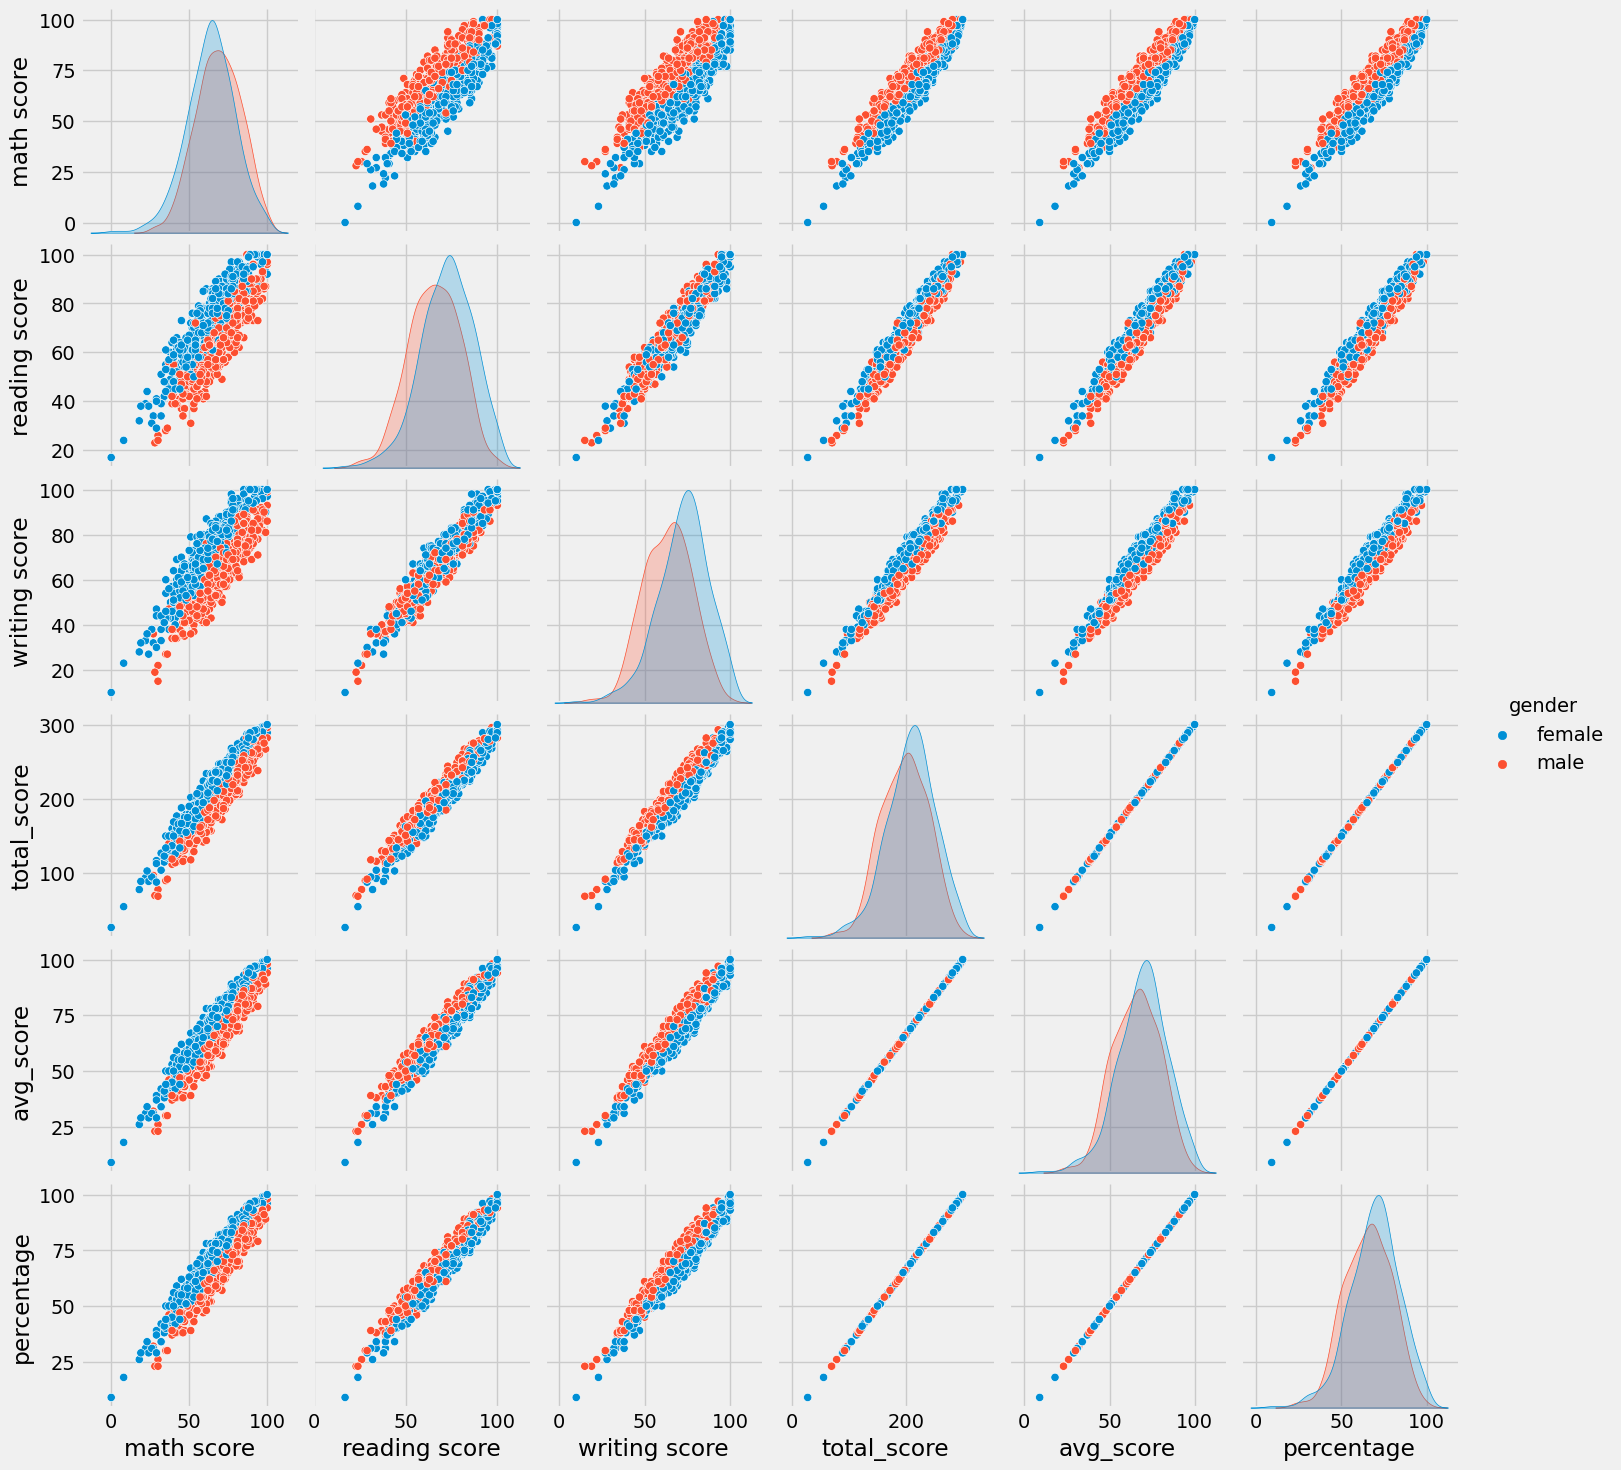

In [95]:
#Checking outliers
sns.pairplot(df,hue='gender')
plt.show()

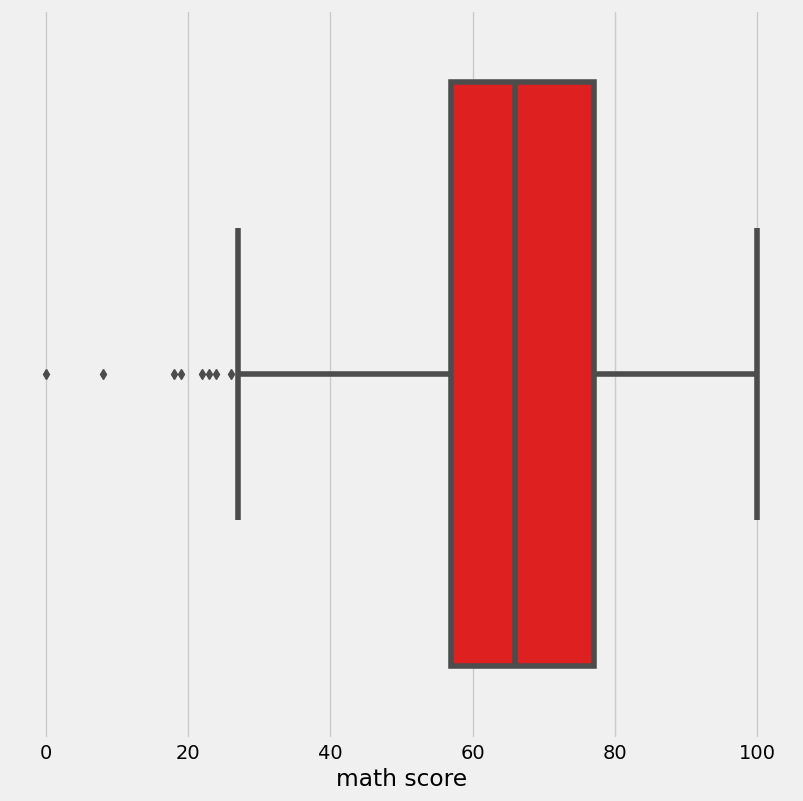

In [96]:
sns.boxplot(df['math score'],color='red')
plt.show()

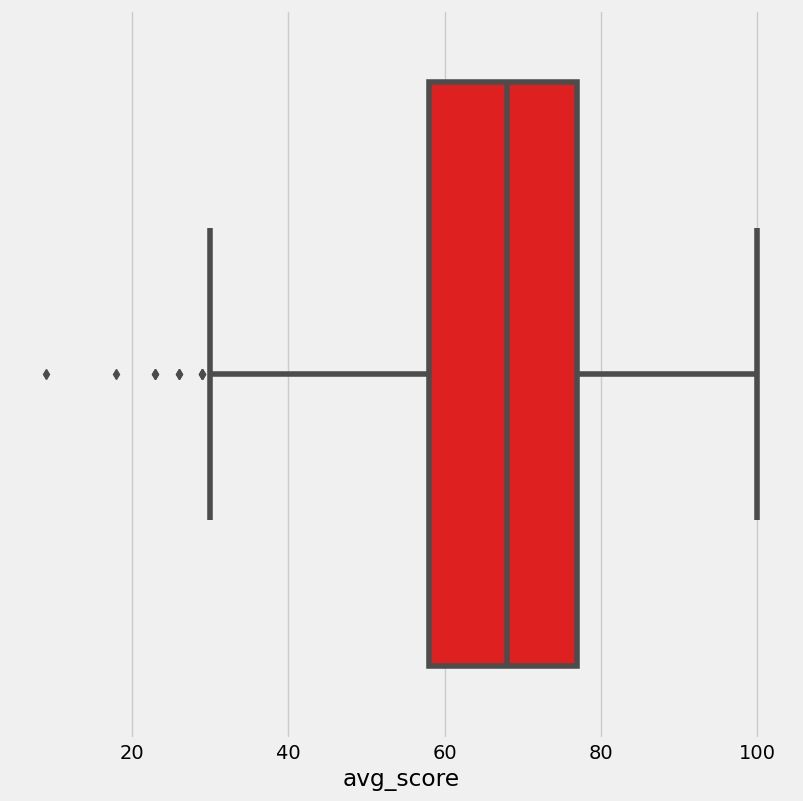

In [97]:
sns.boxplot(df['avg_score'],color='red')
plt.show()

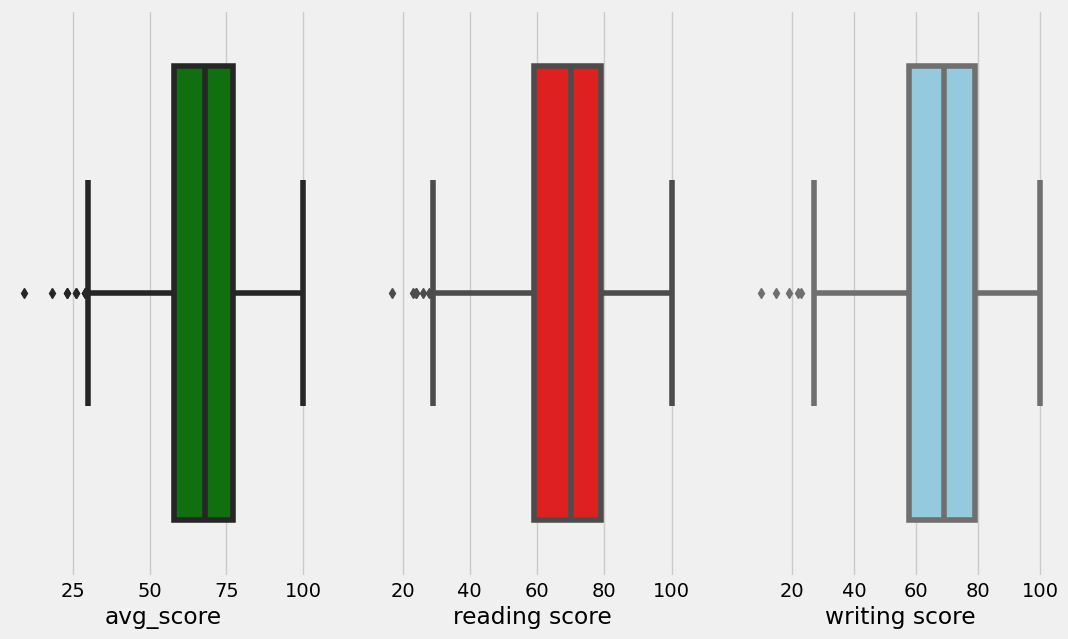

In [98]:
fig,ax=plt.subplots(1,3,figsize=(12,7))
plt.subplot(131)
sns.boxplot(df['avg_score'],color='green')
plt.subplot(132)
sns.boxplot(df['reading score'],color='red')
plt.subplot(133)
sns.boxplot(df['writing score'],color='skyblue')
plt.show()

In [99]:
df.corr()

,math score,reading score,writing score,total_score,avg_score,percentage
math score,1.000000,0.817580,0.802642,0.918746,0.918771,0.918771
reading score,0.817580,1.000000,0.954598,0.970331,0.970048,0.970048
writing score,0.802642,0.954598,1.000000,0.965667,0.965409,0.965409
total_score,0.918746,0.970331,0.965667,1.000000,0.999821,0.999821
avg_score,0.918771,0.970048,0.965409,0.999821,1.000000,1.000000
percentage,0.918771,0.970048,0.965409,0.999821,1.000000,1.000000


<AxesSubplot:>

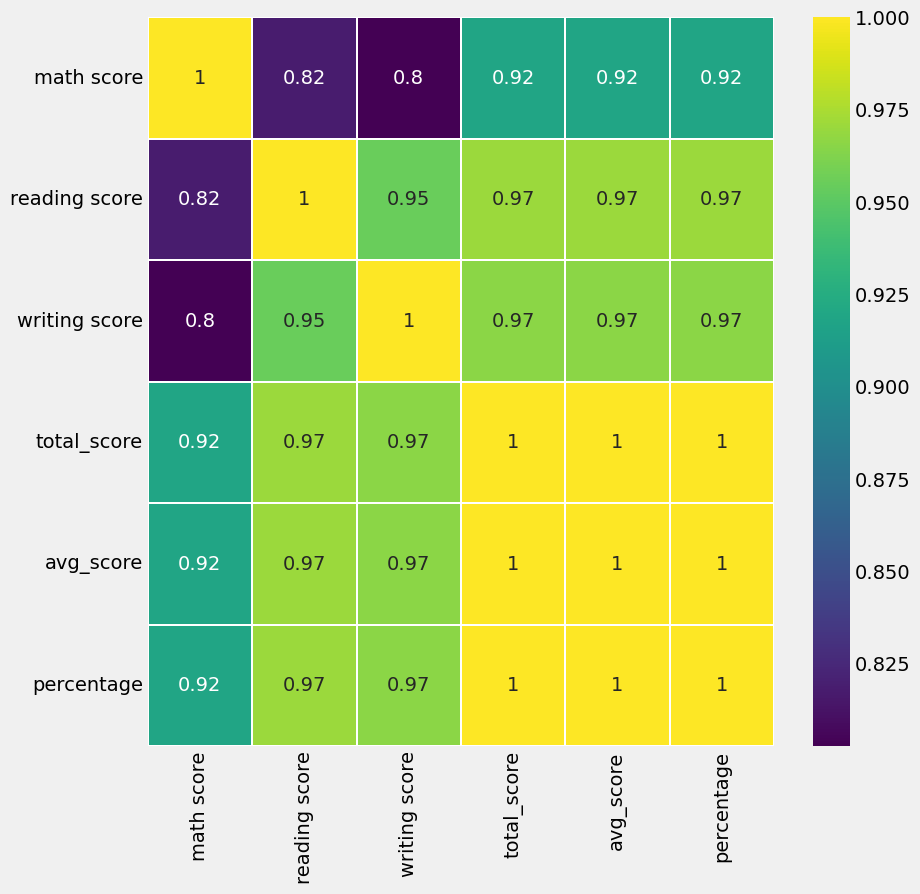

In [100]:
sns.heatmap(df.corr(),annot=True,cmap='viridis', linewidths=0.2)

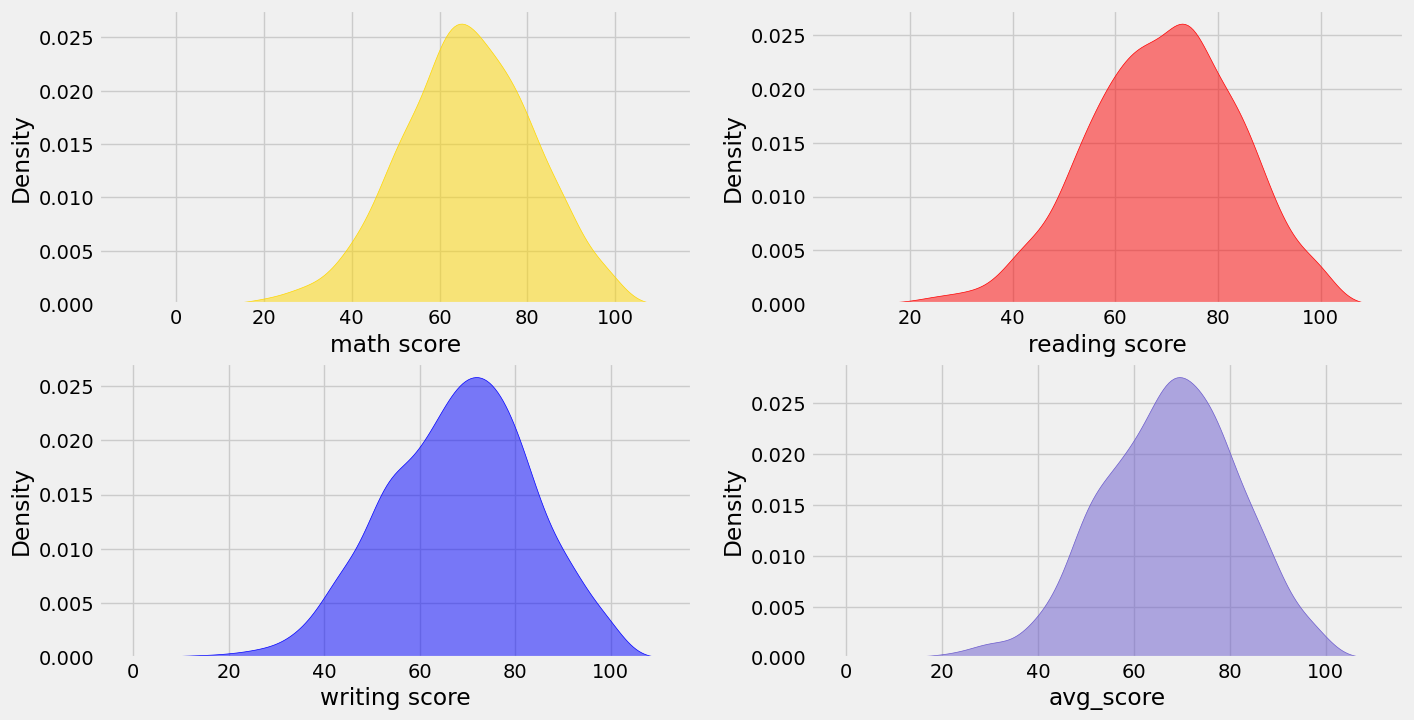

In [101]:
#checking distribution of the data
fig,axs=plt.subplots(2,2,figsize=(15,8))

sns.kdeplot(df['math score'],shade=True,color='gold',label='Maths',ax=axs[0,0],alpha=0.5)
sns.kdeplot(df['reading score'],shade=True,color='red',label='reading',ax=axs[0,1],alpha=0.5)
sns.kdeplot(df['writing score'],shade=True,color='blue',label='writing',ax=axs[1,0],alpha=0.5)
sns.kdeplot(df['avg_score'],shade=True,color='slateblue',label='average',ax=axs[1,1],alpha=0.5)
plt.show()

In [102]:
import scipy.stats as stats

def qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column)) #Probability density function
    plt.subplot(122)
    stats.probplot(df[column],dist="norm",plot=plt)
    plt.title('{} QQ Plot'.format(column)) 
    plt.show()

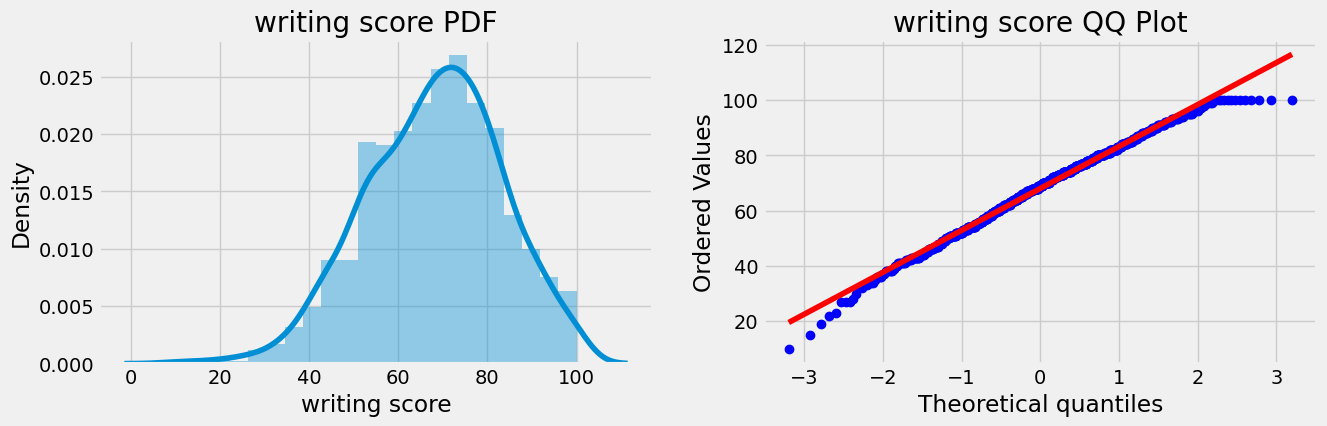

In [103]:
qq_plot(column="writing score")

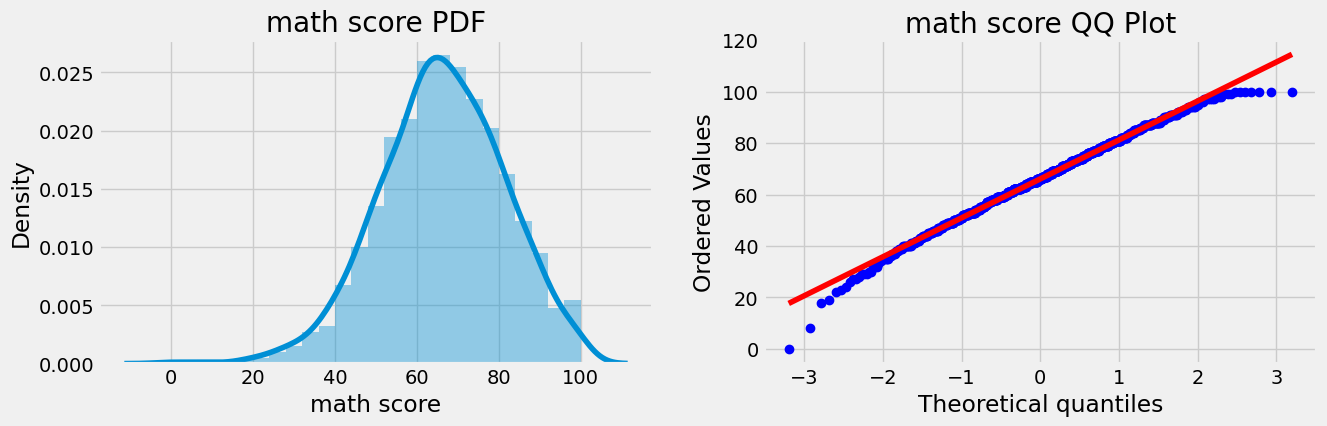

In [104]:
qq_plot(column="math score")

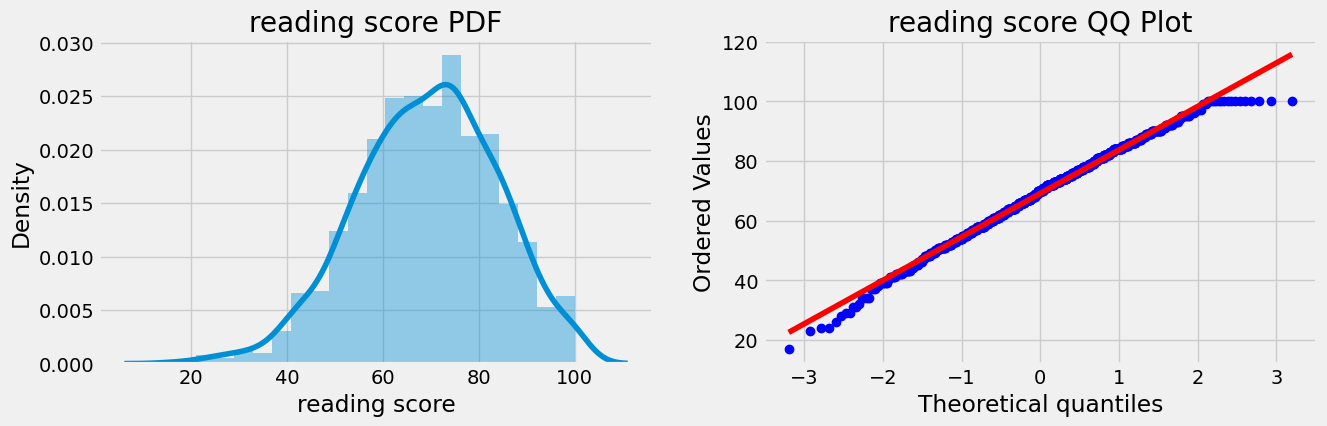

In [105]:
qq_plot('reading score')

In [106]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [107]:
a=remove_outliers_IQR('math score')

percentile25 57.0
percentile75 77.0
Upper limit 107.0
Lower limit 27.0


In [108]:
def comparison_plot(df,df1,column):
    #comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])
    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    plt.subplot(2,2,3)
    sns.distplot(df1[column])
    plt.subplot(2,2,4)
    sns.boxplot(df1[column])
    plt.show()

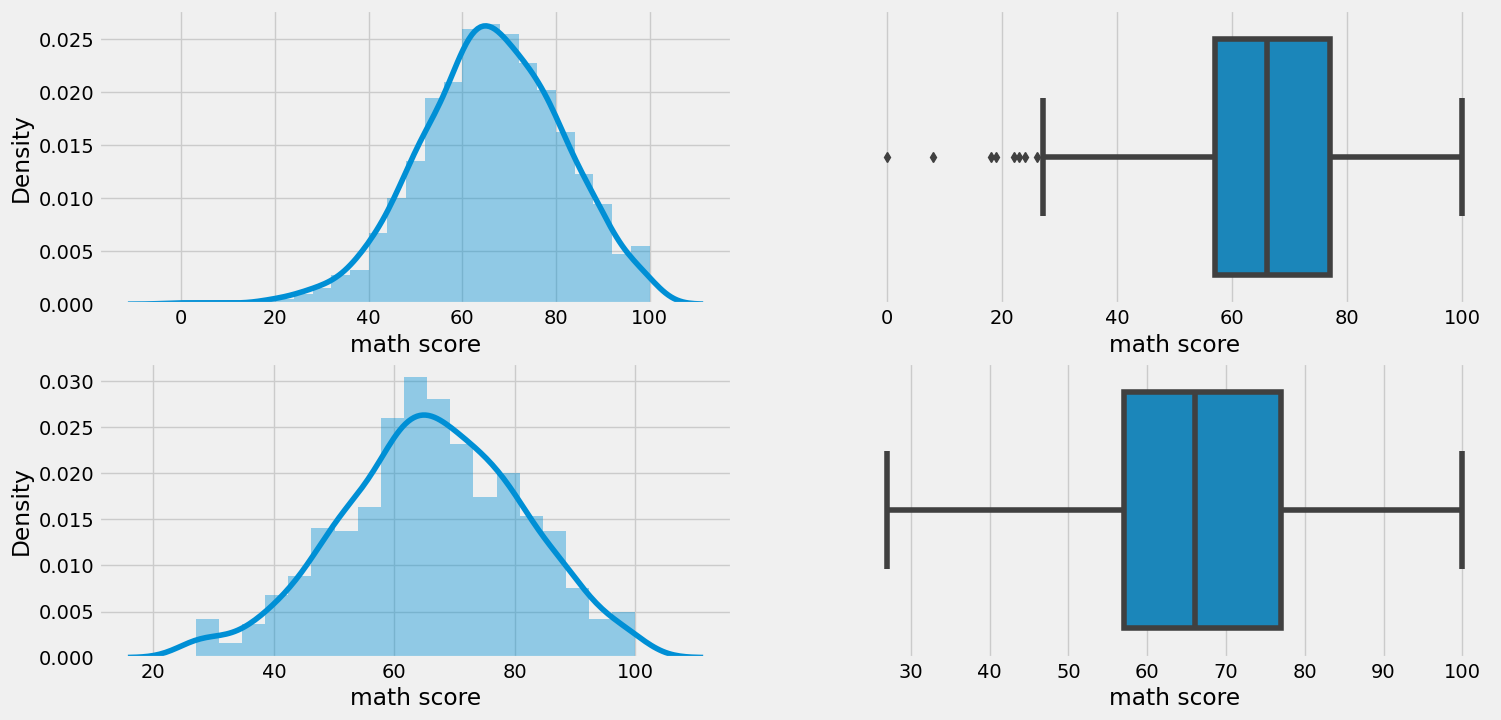

In [109]:
comparison_plot(df,df1,"math score")

In [110]:
remove_outliers_IQR("reading score")

percentile25 59.0
percentile75 79.0
Upper limit 109.0
Lower limit 29.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score,percentage,grade


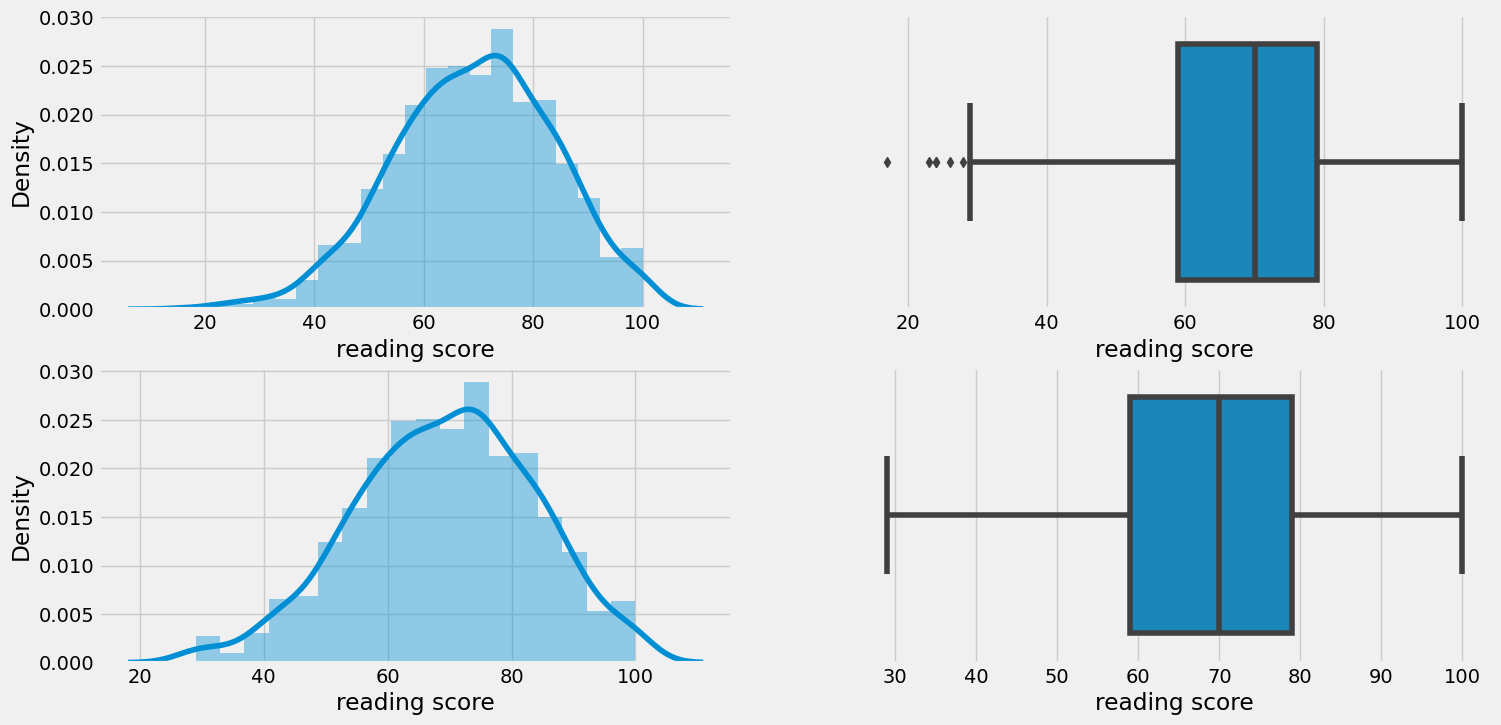

In [111]:
comparison_plot(df,df1,"reading score")

In [112]:
remove_outliers_IQR("writing score")

percentile25 57.75
percentile75 79.0
Upper limit 110.875
Lower limit 25.875


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score,percentage,grade


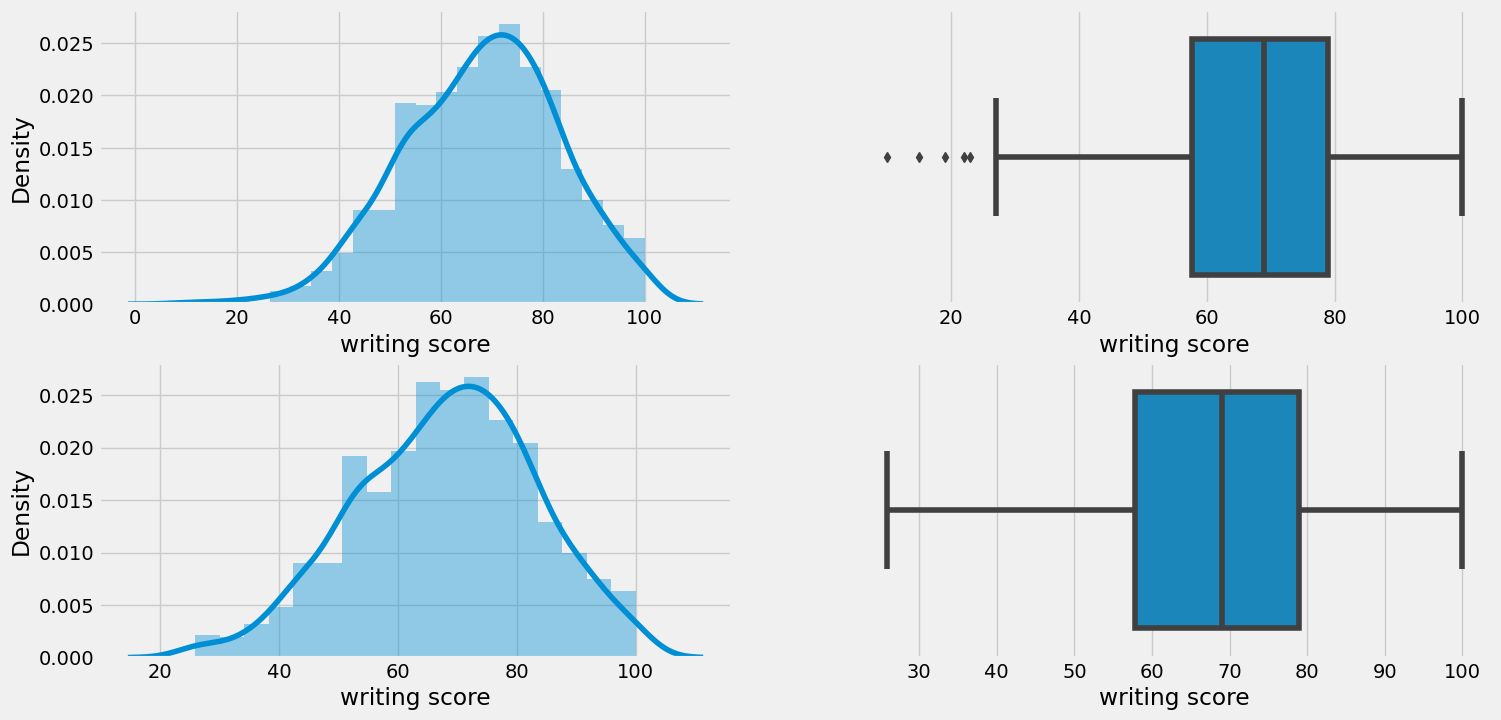

In [113]:
comparison_plot(df,df1,"writing score")

In [114]:
remove_outliers_IQR("avg_score")

percentile25 58.0
percentile75 77.0
Upper limit 105.5
Lower limit 29.5


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score,percentage,grade


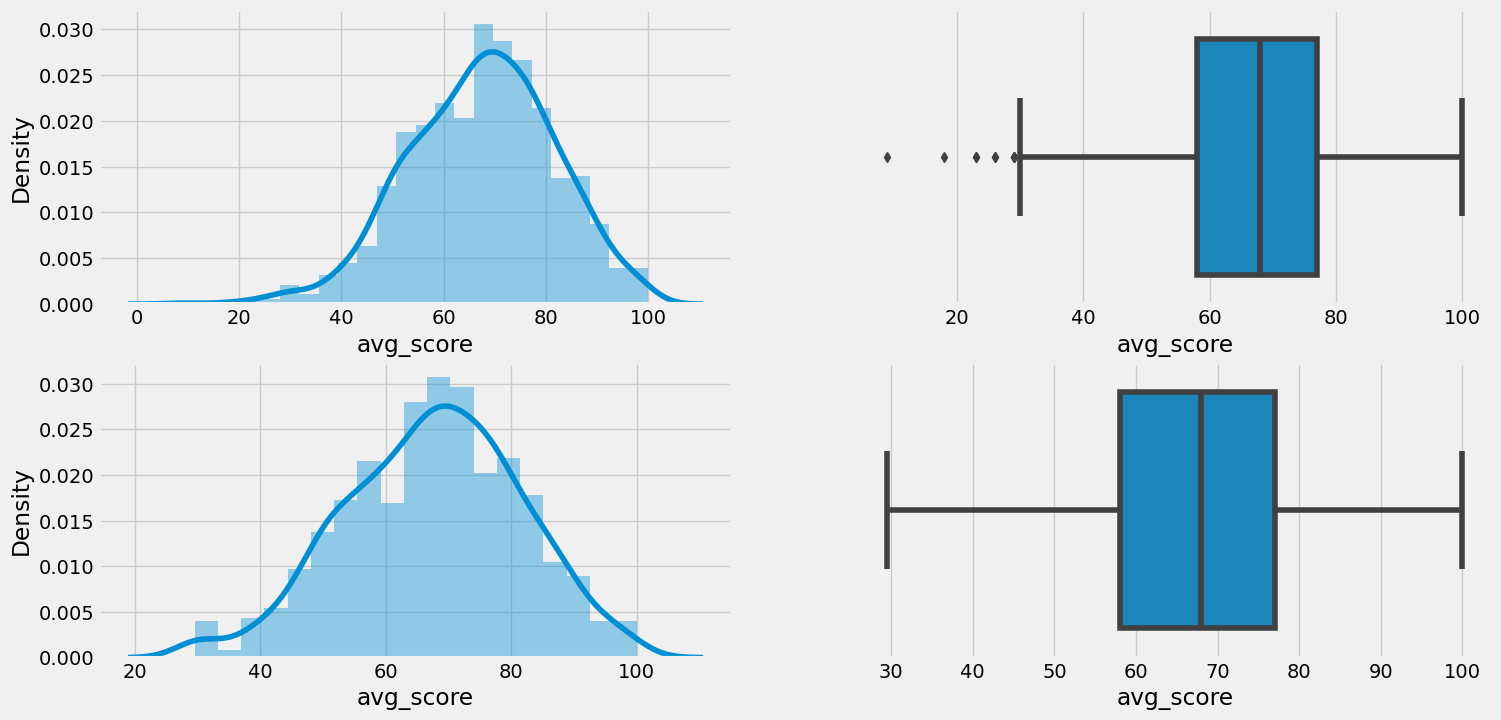

In [115]:
comparison_plot(df,df1,"avg_score")

In [116]:
remove_outliers_IQR("total_score")

percentile25 175.0
percentile75 233.0
Upper limit 320.0
Lower limit 88.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score,percentage,grade


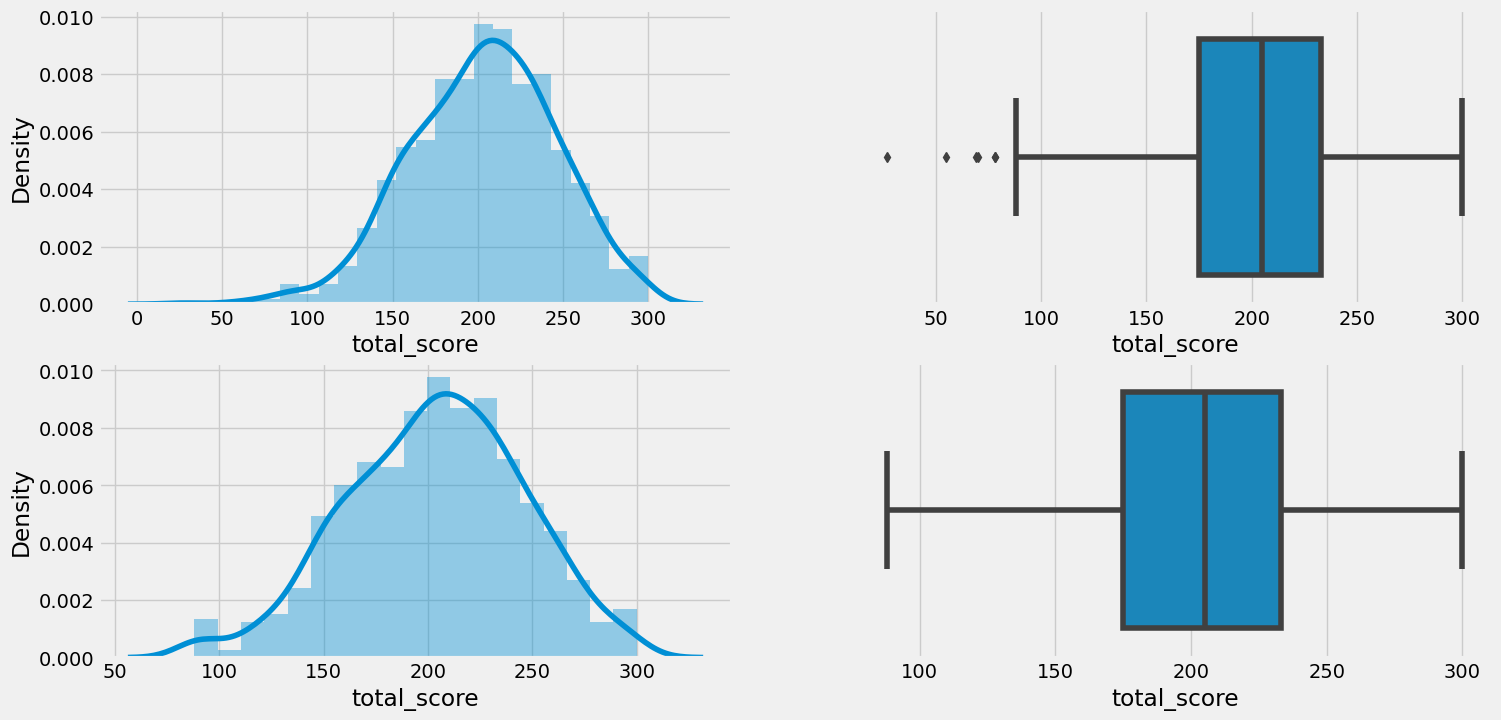

In [117]:
comparison_plot(df,df1,"total_score")

In [118]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
total_score     -0.299057
avg_score       -0.299326
percentage      -0.299326
dtype: float64

In [119]:
df1.skew()

math score      -0.148833
reading score   -0.209790
writing score   -0.223701
total_score     -0.210374
avg_score       -0.207888
percentage      -0.299326
dtype: float64

skewness reduced

In [120]:
df1.shape

(1000, 12)

In [121]:
df1.drop(columns=["grade"],inplace=True)

In [122]:
df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score,percentage
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218.0,72.0,72
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247.0,82.0,82
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278.0,92.0,92
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148.0,49.0,49
4,male,group C,some college,standard,none,76.0,78.0,75.0,229.0,76.0,76
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,282.0,94.0,94
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,172.0,57.0,57
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,195.0,65.0,65
998,female,group D,some college,standard,completed,68.0,78.0,77.0,223.0,74.0,74


In [123]:
#Drop multicollinearity Data with Average
df1.drop(columns=['total_score'],inplace=True)

In [124]:
# Divide your data in train and test set 

X = df1.drop(columns=['avg_score'],axis=1)
y = df1['avg_score']

In [125]:
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
num_features

['math score', 'reading score', 'writing score', 'percentage']

In [126]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
categorical_features


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [127]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PowerTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

* Column Transformer is a sciket-learn class used to create and apply separate transformers for numerical and categorical data. 
* To create transformers we need to specify the transformer object and pass the list of transformations inside a tuple along with the column on which you want to apply the transformation.

In [128]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,72
1,female,group C,some college,standard,completed,69.0,90.0,88.0,82
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,92
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,49
4,male,group C,some college,standard,none,76.0,78.0,75.0,76


In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [131]:
ct= ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4]),
    ('tnf2',StandardScaler(),[5,6,7,8])
],remainder='passthrough')

In [132]:
X_train_transformed=ct.fit_transform(X_train)

In [133]:
X_train.shape

(800, 9)

In [134]:
X_train_transformed.shape

(800, 16)

26

270